### back2normal
Supplementary analysis of the back2normal data

In [18]:
import pandas as pd
from plotnine import ggplot, geom_bar, geom_point, aes, stat_smooth, facet_wrap, coord_flip, labs
import build_db
from core.data.socrata import soda_data, socrata_api_requests
from core.data import dbclient, daily_case_data_by_zip
from core.data.groundtruth import process_ground_truth_data

In [2]:
# connect to db and show all tables
db = dbclient.DBClient()
db.cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(db.cursor.fetchall())

[('VACCINATIONS',), ('DAILY_COVID_CASE_DATA',), ('DAILY_FOOT_TRAFFIC_DATA',), ('TRAFFIC_CRASH_DATA',), ('DEMOGRAPHICS',)]


### Vaccination Data

In [4]:
query = f"select * from {build_db.VACC_TBL}"
print(f"query = {query}")
vacc_df = pd.read_sql_query(query, db.conn)
vacc_df.describe(include='all')

query = select * from VACCINATIONS


,index,ZIPCODE,STD_DATE,total_doses_daily,total_doses_cumulative,vaccine_series_completed_daily,vaccine_series_completed_percent_population,population,AVG7DAY_total_doses_daily,AVG7DAY_vaccine_series_completed_daily
count,5000.000000,4921,5000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4567.000000,4567.000000
unique,NaN,59,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,60604,2021-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,92,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2499.500000,NaN,NaN,146.633800,4656.334600,52.446000,0.03444,46196.573800,148.845757,53.773656
std,1443.520003,NaN,NaN,165.976289,5471.868558,73.013873,0.04749,26641.069814,138.271934,61.317625
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1249.750000,NaN,NaN,23.000000,528.250000,1.000000,0.00000,28569.000000,38.571429,3.928571
50%,2499.500000,NaN,NaN,92.000000,2363.000000,21.000000,0.01500,44498.000000,113.000000,31.142857
75%,3749.250000,NaN,NaN,219.000000,7209.500000,75.250000,0.05100,67711.000000,220.071429,81.642857


In [6]:
max_date_vacc = vacc_df.STD_DATE.max()
max_date_ind_vacc = vacc_df.STD_DATE == max_date_vacc
today_vacc = vacc_df[max_date_ind_vacc]
print(f"nrow recent vaccination data {len(today_vacc)}")
today_vacc.head()

nrow recent vaccination data 60


,index,ZIPCODE,STD_DATE,total_doses_daily,total_doses_cumulative,vaccine_series_completed_daily,vaccine_series_completed_percent_population,population,AVG7DAY_total_doses_daily,AVG7DAY_vaccine_series_completed_daily
4940,1804,60652,2021-03-16 00:00:00,408,11493,63,0.082,43447,406.142857,112.000000
4941,1761,60611,2021-03-16 00:00:00,123,19248,47,0.249,33224,221.000000,106.571429
4942,1805,60616,2021-03-16 00:00:00,209,17236,76,0.117,54197,298.142857,115.285714
4943,264,60707,2021-03-16 00:00:00,46,4175,18,0.032,43093,103.428571,39.571429
4944,269,60653,2021-03-16 00:00:00,176,8473,30,0.086,33154,197.142857,59.000000


### Foot Traffic Data

In [7]:
query = f"select * from {build_db.FOOT_TRAFF_TBL}"
print(f"query = {query}")
foot_traffic_df = pd.read_sql_query(query, db.conn)
foot_traffic_df.describe(include='all')

query = select * from DAILY_FOOT_TRAFFIC_DATA


,index,STD_DATE,ZIPCODE,AIRPORTS_TRANSIT_CENTERS,BARS,BEAUTY_WELLNESS,FITNESS_CENTERS,GROCERY,MASS_MERCH,PARKS_BEACHES,...,RESTAURANT,RETAIL,SCHOOLS_LIBRARIES,SHOPPING_CENTERS_MALLS,TOURIST_ATTRACTIONS,AVG7DAY_BARS,AVG7DAY_GROCERY,AVG7DAY_RESTAURANT,AVG7DAY_PARKS_BEACHES,AVG7DAY_SCHOOLS_LIBRARIES
count,25724.000000,25724,25724,17004.000000,25288.000000,25724.000000,22236.000000,17004.000000,16132.000000,23108.000000,...,24852.000000,19620.000000,24852.000000,22236.000000,19620.000000,24940.000000,16770.000000,24510.000000,22790.000000,24510.000000
unique,NaN,436,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-07-01 00:00:00,60639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,59,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12861.500000,NaN,NaN,50.086568,55.053622,64.913855,57.422513,83.968243,61.747149,78.690454,...,93.205054,60.165698,54.164172,64.963752,57.582518,54.730089,83.862348,92.768578,78.489826,53.680993
std,7426.023498,NaN,NaN,56.654978,38.023444,28.041231,51.594104,33.390125,36.472314,120.264241,...,274.585147,40.787870,43.181279,28.638627,50.361510,32.572987,30.068362,260.071679,95.741359,34.879655
min,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.428571,0.000000
25%,6430.750000,NaN,NaN,21.000000,30.000000,47.000000,32.000000,62.000000,41.000000,41.000000,...,47.000000,31.000000,28.000000,46.000000,23.000000,32.428571,63.428571,48.714286,45.285714,30.714286
50%,12861.500000,NaN,NaN,33.000000,47.000000,63.000000,46.000000,80.000000,63.000000,64.000000,...,68.000000,57.000000,48.000000,63.000000,50.000000,47.857143,81.428571,69.000000,66.428571,48.428571
75%,19292.250000,NaN,NaN,64.000000,71.000000,81.000000,69.000000,102.000000,84.000000,95.000000,...,89.000000,83.000000,68.000000,81.000000,81.000000,71.428571,101.714286,89.857143,91.285714,67.428571


In [8]:
max_date_gt = foot_traffic_df.STD_DATE.max()
max_date_ind_gt = foot_traffic_df.STD_DATE == max_date_gt
today_gt = foot_traffic_df[max_date_ind_gt]
print(f"nrow recent groundtruth data {len(today_gt)}")
today_gt.head()

nrow recent groundtruth data 59


,index,STD_DATE,ZIPCODE,AIRPORTS_TRANSIT_CENTERS,BARS,BEAUTY_WELLNESS,FITNESS_CENTERS,GROCERY,MASS_MERCH,PARKS_BEACHES,...,RESTAURANT,RETAIL,SCHOOLS_LIBRARIES,SHOPPING_CENTERS_MALLS,TOURIST_ATTRACTIONS,AVG7DAY_BARS,AVG7DAY_GROCERY,AVG7DAY_RESTAURANT,AVG7DAY_PARKS_BEACHES,AVG7DAY_SCHOOLS_LIBRARIES
25665,8284,2021-03-09 00:00:00,60645,NaN,59.0,80.0,NaN,NaN,NaN,80.0,...,82.0,68.0,50.0,74.0,84.0,46.571429,NaN,91.571429,45.857143,89.285714
25666,7848,2021-03-09 00:00:00,60651,NaN,56.0,87.0,24.0,380.0,185.0,79.0,...,89.0,69.0,483.0,78.0,NaN,74.142857,319.0,91.000000,69.285714,356.000000
25667,17876,2021-03-09 00:00:00,60606,36.0,48.0,33.0,27.0,NaN,NaN,NaN,...,27.0,NaN,33.0,9.0,25.0,30.000000,NaN,18.428571,NaN,28.000000
25668,10028,2021-03-09 00:00:00,60653,86.0,NaN,111.0,NaN,NaN,NaN,55.0,...,51.0,73.0,0.0,NaN,0.0,NaN,NaN,70.000000,49.285714,0.000000
25669,4360,2021-03-09 00:00:00,60634,200.0,66.0,91.0,75.0,98.0,76.0,158.0,...,91.0,70.0,62.0,67.0,96.0,74.714286,96.0,90.000000,102.428571,62.142857


### Demographic Data

In [9]:
query = f"select * from {build_db.CENSUS_TBL}"
print(f"query = {query}")
census_df = pd.read_sql_query(query, db.conn)
census_df.describe(include='all')

query = select * from DEMOGRAPHICS


,index,zcta,hhold_size,fam_size,unemploy_rate,median_income,pct_below_poverty_lvl,median_age,pct_65_or_older,pct_hispanic,...,pct_white,pct_pacific_islander,pct_american_indian,pct_other_race,pct_high_school_grad,pct_hholds_w_computer,pct_hholds_w_internet,pct_w_health_insur,state,ZIPCODE
count,58.000000,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58
unique,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,NaN,ZCTA5 60625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60630
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,28.500000,NaN,2.416724,3.222759,5.306897,69298.913793,13.234483,35.377586,12.405172,21.343103,...,38.406897,0.012069,0.200000,0.210345,20.458621,88.603448,79.363793,91.806897,17.0,NaN
std,16.886879,NaN,0.545085,0.527662,3.301986,35812.102415,9.850827,3.657678,4.305705,21.570831,...,27.443210,0.032861,0.861659,0.213319,11.979237,7.252391,9.459622,4.489983,0.0,NaN
min,0.000000,NaN,1.490000,2.140000,0.200000,22158.000000,0.000000,30.200000,0.500000,1.300000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.500000,56.600000,79.800000,17.0,NaN
25%,14.250000,NaN,1.965000,2.872500,2.650000,41563.500000,5.000000,32.300000,9.900000,5.725000,...,7.900000,0.000000,0.000000,0.100000,8.425000,83.450000,73.750000,88.175000,17.0,NaN
50%,28.500000,NaN,2.500000,3.355000,4.200000,62631.500000,10.350000,34.500000,11.850000,11.500000,...,44.650000,0.000000,0.100000,0.100000,21.700000,90.100000,79.450000,91.700000,17.0,NaN
75%,42.750000,NaN,2.787500,3.607500,7.425000,94877.000000,19.200000,37.950000,15.350000,38.100000,...,62.075000,0.000000,0.100000,0.300000,30.150000,93.850000,87.400000,95.675000,17.0,NaN


### Merge Datasets

In [12]:
data = today_vacc.merge(today_gt, on="ZIPCODE")
data = data.merge(census_df, on="ZIPCODE")
print(f"nrow merged dataset: {len(data)}")
print(data.head())

nrow merged dataset: 58
   index_x ZIPCODE           STD_DATE_x  total_doses_daily  \
0     1804   60652  2021-03-16 00:00:00                408   
1     1761   60611  2021-03-16 00:00:00                123   
2     1805   60616  2021-03-16 00:00:00                209   
3      264   60707  2021-03-16 00:00:00                 46   
4      269   60653  2021-03-16 00:00:00                176   

   total_doses_cumulative  vaccine_series_completed_daily  \
0                   11493                              63   
1                   19248                              47   
2                   17236                              76   
3                    4175                              18   
4                    8473                              30   

   vaccine_series_completed_percent_population  population  \
0                                        0.082       43447   
1                                        0.249       33224   
2                                        0.117    

# PLOTS and words

### Vaccination rate by populuation size

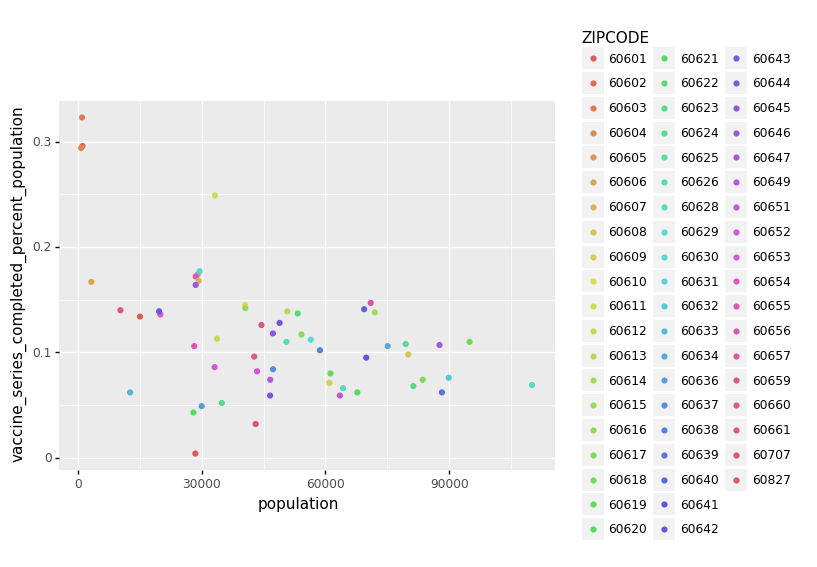

<ggplot: (-9223372036544763157)>

In [29]:
p = ggplot(aes(x='population', y='vaccine_series_completed_percent_population'), data)
p + geom_point()
p + geom_point(aes(color='ZIPCODE'))

### Vaccination rate by percent white

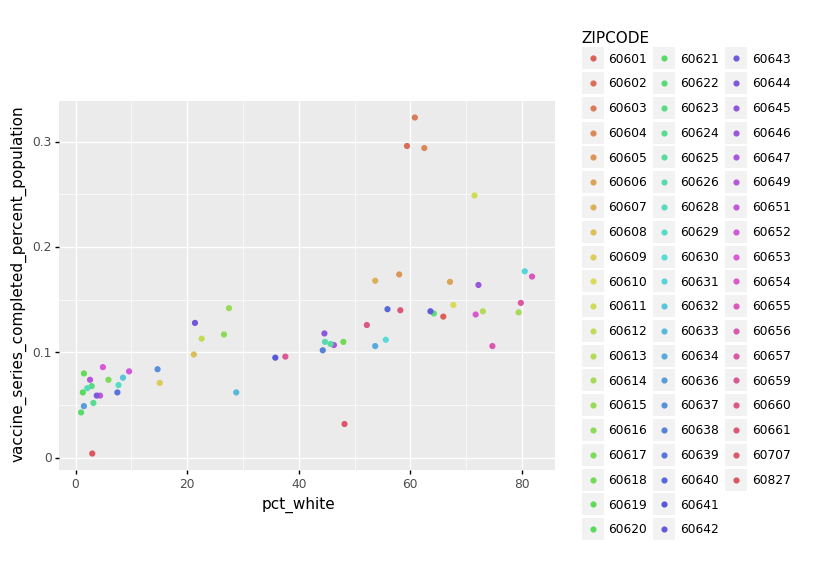

<ggplot: (-9223372036544322707)>

In [30]:
p = ggplot(aes(x='pct_white', y='vaccine_series_completed_percent_population'), data)
p + geom_point()
p + geom_point(aes(color='ZIPCODE'))

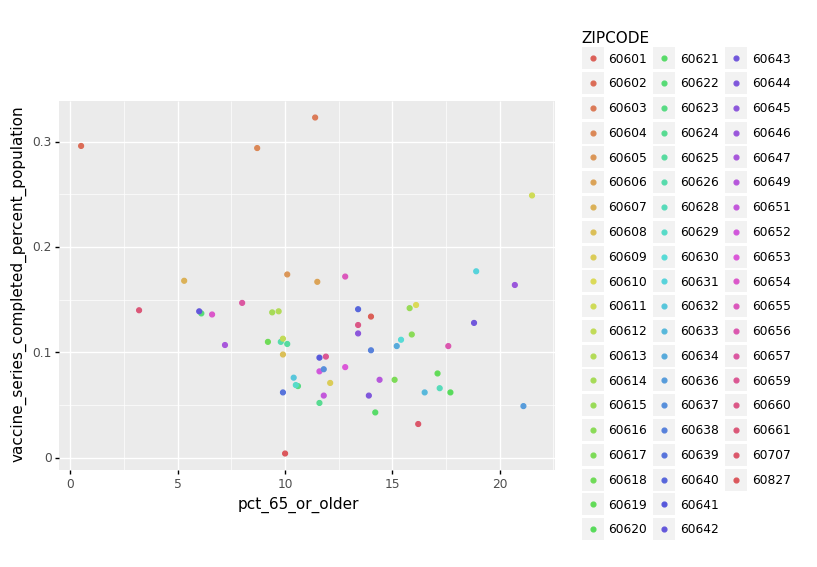

<ggplot: (-9223372036544322770)>

In [31]:
p = ggplot(aes(x='pct_65_or_older', y='vaccine_series_completed_percent_population'), data)
p + geom_point()
p + geom_point(aes(color='ZIPCODE'))

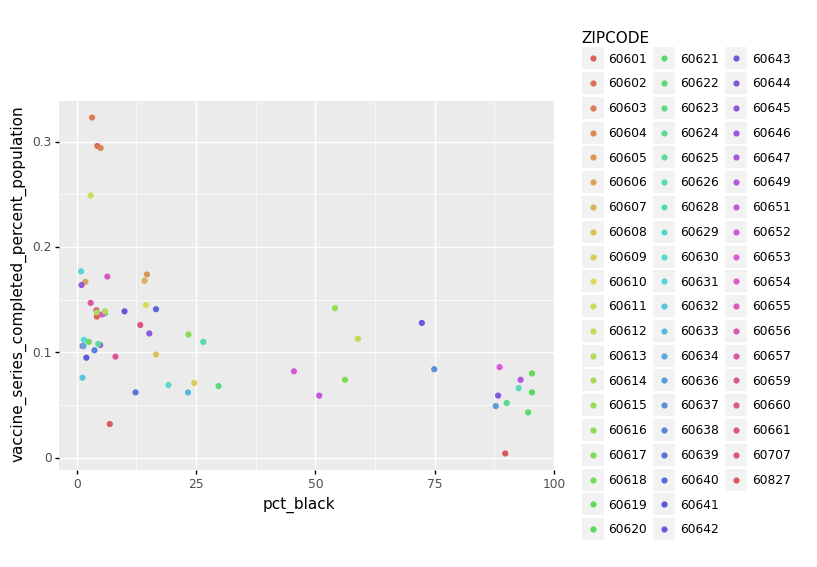

<ggplot: (310429851)>

In [32]:
p = ggplot(aes(x='pct_black', y='vaccine_series_completed_percent_population'), data)
p + geom_point()
p + geom_point(aes(color='ZIPCODE'))